# Лабораторная работа 1
### Сбор, визуализация и анализ данных по графу

#### Часть 1
В этой части было необходимо загрузить данные о 250 статьях об астрофизике через api с arxiv.com.

Category Taxonomy - Astrophysics (astro-ph).

In [7]:
!pip install arxiv

In [8]:
import arxiv
import urllib.request as libreq
import pandas as pd

In [9]:
# Можно так, но мне почему-то понравилась реализация ниже
with libreq.urlopen('http://export.arxiv.org/api/query?search_query=all:astro+ph&start=0&max_results=250') as url:
    r = url.read()
print(r)

b'<?xml version="1.0" encoding="UTF-8"?>\n<feed xmlns="http://www.w3.org/2005/Atom">\n  <link href="http://arxiv.org/api/query?search_query%3Dall%3Aastro%20ph%26id_list%3D%26start%3D0%26max_results%3D250" rel="self" type="application/atom+xml"/>\n  <title type="html">ArXiv Query: search_query=all:astro ph&amp;id_list=&amp;start=0&amp;max_results=250</title>\n  <id>http://arxiv.org/api/R8ZmscBGQ3MhBDwBj5QBv9rEEDs</id>\n  <updated>2025-09-11T00:00:00-04:00</updated>\n  <opensearch:totalResults xmlns:opensearch="http://a9.com/-/spec/opensearch/1.1/">13438</opensearch:totalResults>\n  <opensearch:startIndex xmlns:opensearch="http://a9.com/-/spec/opensearch/1.1/">0</opensearch:startIndex>\n  <opensearch:itemsPerPage xmlns:opensearch="http://a9.com/-/spec/opensearch/1.1/">250</opensearch:itemsPerPage>\n  <entry>\n    <id>http://arxiv.org/abs/astro-ph/0503519v1</id>\n    <updated>2005-03-23T22:41:00Z</updated>\n    <published>2005-03-23T22:41:00Z</published>\n    <title>The Rise and Citation 

In [10]:
result_generator = arxiv.Client(
    page_size=100,
    delay_seconds=3
).results(arxiv.Search(
    query="astro ph",
    sort_by = arxiv.SortCriterion.SubmittedDate,
    max_results=250
))

astro = []
for result in result_generator:
    astro.append(result)

In [11]:
astro_pd = pd.DataFrame([vars(result) for result in astro])

In [12]:
astro_pd.shape

(250, 14)

In [13]:
astro_pd.head(5)

,entry_id,updated,published,title,authors,summary,comment,journal_ref,doi,primary_category,categories,links,pdf_url,_raw
0,http://arxiv.org/abs/2509.08426v1,2025-09-10 09:15:15+00:00,2025-09-10 09:15:15+00:00,Pulsations in Binary Star Systems,"[John Southworth, Dominic Bowman]",High-precision and long-duration light curves ...,40 pages including 4 colour figures. Manuscrip...,None,None,astro-ph.SR,[astro-ph.SR],"[http://arxiv.org/abs/2509.08426v1, http://arx...",http://arxiv.org/pdf/2509.08426v1,"{'id': 'http://arxiv.org/abs/2509.08426v1', 'g..."
1,http://arxiv.org/abs/2509.06955v1,2025-09-08 17:59:58+00:00,2025-09-08 17:59:58+00:00,Constraints on Dark Matter Models from Superma...,"[John Ellis, Malcolm Fairbairn, Juan Urrutia, ...",A semi-analytical model for the evolution of g...,"6 pages, 5 figures",None,None,astro-ph.CO,"[astro-ph.CO, astro-ph.HE, hep-ex, hep-ph]","[http://arxiv.org/abs/2509.06955v1, http://arx...",http://arxiv.org/pdf/2509.06955v1,"{'id': 'http://arxiv.org/abs/2509.06955v1', 'g..."
2,http://arxiv.org/abs/2509.06853v1,2025-09-08 16:21:11+00:00,2025-09-08 16:21:11+00:00,Reinforcement learning meets bioprocess contro...,"[Juan D. Gil, Ehecatl Antonio Del Rio Chanona,...",The inherent complexity of living cells as pro...,None,None,None,eess.SY,"[eess.SY, cs.AI, cs.LG, cs.SY]","[http://arxiv.org/abs/2509.06853v1, http://arx...",http://arxiv.org/pdf/2509.06853v1,"{'id': 'http://arxiv.org/abs/2509.06853v1', 'g..."
3,http://arxiv.org/abs/2509.06695v1,2025-09-08 13:47:24+00:00,2025-09-08 13:47:24+00:00,Hydrodynamical Simulations of Planet Rebound M...,"[Beibei Liu, Clément Baruteau, Zhaohuan Zhu, Y...",This study investigates the orbital migration ...,"10 pages, 8 figures, accepted in A&A, animatio...",None,None,astro-ph.EP,[astro-ph.EP],"[http://arxiv.org/abs/2509.06695v1, http://arx...",http://arxiv.org/pdf/2509.06695v1,"{'id': 'http://arxiv.org/abs/2509.06695v1', 'g..."
4,http://arxiv.org/abs/2509.06674v1,2025-09-08 13:34:34+00:00,2025-09-08 13:34:34+00:00,Port-Hamiltonian Neural Networks: From Theory ...,"[Luca Di Persio, Matthias Ehrhardt, Youness Ou...",This work introduces a new framework integrati...,None,None,None,math-ph,"[math-ph, math.CA, math.MP, 37N40, 37B52, 60G1...","[http://arxiv.org/abs/2509.06674v1, http://arx...",http://arxiv.org/pdf/2509.06674v1,"{'id': 'http://arxiv.org/abs/2509.06674v1', 'g..."


#### Часть 2

На следующем этапе я загрузила модель для извлечения ключевых слов. Выбор пал на https://www.google.com/url?q=https%3A%2F%2Fhuggingface.co%2Filsilfverskiold%2Ftech-keywords-extractor, она же была представлена в примере отчета. После этого я подготовила данные и извлекла ключевые слова.

In [14]:
!pip install -U transformers
!pip install torch

In [15]:
import torch
from transformers import AutoTokenizer, AutoModelForSeq2SeqLM, pipeline
from tqdm.auto import tqdm
tqdm.pandas()

C:\Users\maffi\AppData\Local\Programs\Python\Python312\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [16]:
print(torch.__version__)

2.8.0+cpu


In [17]:
# Load model directly
tokenizer = AutoTokenizer.from_pretrained("ilsilfverskiold/tech-keywords-extractor")
model = AutoModelForSeq2SeqLM.from_pretrained("ilsilfverskiold/tech-keywords-extractor")

# Воспользуемся оберткой вокруг загруженной модели для удобства:
pipe = pipeline(
    "text2text-generation", 
    model=model, 
    tokenizer=tokenizer
)

Device set to use cpu


In [18]:
astro_data_pd = []
for _, row in astro_pd.iterrows():
    data = {
        "title": row['title'],
        "summary": row['summary'],
        "authors": row.get('authors', []),
        "categories": row.get('categories', [])
    }
    astro_data_pd.append(data)

df = pd.DataFrame(astro_data_pd)
print(df.shape)
df.head(5)

(250, 4)


,title,summary,authors,categories
0,Pulsations in Binary Star Systems,High-precision and long-duration light curves ...,"[John Southworth, Dominic Bowman]",[astro-ph.SR]
1,Constraints on Dark Matter Models from Superma...,A semi-analytical model for the evolution of g...,"[John Ellis, Malcolm Fairbairn, Juan Urrutia, ...","[astro-ph.CO, astro-ph.HE, hep-ex, hep-ph]"
2,Reinforcement learning meets bioprocess contro...,The inherent complexity of living cells as pro...,"[Juan D. Gil, Ehecatl Antonio Del Rio Chanona,...","[eess.SY, cs.AI, cs.LG, cs.SY]"
3,Hydrodynamical Simulations of Planet Rebound M...,This study investigates the orbital migration ...,"[Beibei Liu, Clément Baruteau, Zhaohuan Zhu, Y...",[astro-ph.EP]
4,Port-Hamiltonian Neural Networks: From Theory ...,This work introduces a new framework integrati...,"[Luca Di Persio, Matthias Ehrhardt, Youness Ou...","[math-ph, math.CA, math.MP, 37N40, 37B52, 60G1..."


In [19]:
# Функция для выделения ключевых слов по каждой публикации:

%time
def highlighting_keywords(row):
    combine_text = row['title'] + " " + row['summary']
    result = pipe(combine_text)[0]["generated_text"].split(",")
    keywords = [kw.strip() for kw in result]
    return keywords

df["keywords"] = df.progress_apply(highlighting_keywords, axis=1)

CPU times: total: 0 ns
Wall time: 0 ns


100%|██████████| 250/250 [11:05<00:00,  2.66s/it]


In [20]:
df.head(5)

,title,summary,authors,categories,keywords
0,Pulsations in Binary Star Systems,High-precision and long-duration light curves ...,"[John Southworth, Dominic Bowman]",[astro-ph.SR],"[Pulsations, Binary Star Systems, Astrophysics..."
1,Constraints on Dark Matter Models from Superma...,A semi-analytical model for the evolution of g...,"[John Ellis, Malcolm Fairbairn, Juan Urrutia, ...","[astro-ph.CO, astro-ph.HE, hep-ex, hep-ph]","[Dark Matter, Supermassive Black Hole, CDM, JW..."
2,Reinforcement learning meets bioprocess contro...,The inherent complexity of living cells as pro...,"[Juan D. Gil, Ehecatl Antonio Del Rio Chanona,...","[eess.SY, cs.AI, cs.LG, cs.SY]","[Reinforcement Learning, RL, Behavior Cloning,..."
3,Hydrodynamical Simulations of Planet Rebound M...,This study investigates the orbital migration ...,"[Beibei Liu, Clément Baruteau, Zhaohuan Zhu, Y...",[astro-ph.EP],"[Hydrodynamical Simulations, Planet Rebound Mi..."
4,Port-Hamiltonian Neural Networks: From Theory ...,This work introduces a new framework integrati...,"[Luca Di Persio, Matthias Ehrhardt, Youness Ou...","[math-ph, math.CA, math.MP, 37N40, 37B52, 60G1...","[Port-Hamiltonian Neural Networks, pHNNs, Stoc..."


In [21]:
df['authors'] = df['authors'].apply(lambda authors_list: [author.name for author in authors_list])

In [22]:
df.to_csv("astro_ph_250.csv", index=False)
df = pd.read_csv("astro_ph_250.csv")
df.head(5)

,title,summary,authors,categories,keywords
0,Pulsations in Binary Star Systems,High-precision and long-duration light curves ...,"['John Southworth', 'Dominic Bowman']",['astro-ph.SR'],"['Pulsations', 'Binary Star Systems', 'Astroph..."
1,Constraints on Dark Matter Models from Superma...,A semi-analytical model for the evolution of g...,"['John Ellis', 'Malcolm Fairbairn', 'Juan Urru...","['astro-ph.CO', 'astro-ph.HE', 'hep-ex', 'hep-...","['Dark Matter', 'Supermassive Black Hole', 'CD..."
2,Reinforcement learning meets bioprocess contro...,The inherent complexity of living cells as pro...,"['Juan D. Gil', 'Ehecatl Antonio Del Rio Chano...","['eess.SY', 'cs.AI', 'cs.LG', 'cs.SY']","['Reinforcement Learning', 'RL', 'Behavior Clo..."
3,Hydrodynamical Simulations of Planet Rebound M...,This study investigates the orbital migration ...,"['Beibei Liu', 'Clément Baruteau', 'Zhaohuan Z...",['astro-ph.EP'],"['Hydrodynamical Simulations', 'Planet Rebound..."
4,Port-Hamiltonian Neural Networks: From Theory ...,This work introduces a new framework integrati...,"['Luca Di Persio', 'Matthias Ehrhardt', 'Youne...","['math-ph', 'math.CA', 'math.MP', '37N40, 37B5...","['Port-Hamiltonian Neural Networks', 'pHNNs', ..."


#### Часть 3

В этой части лабораторной я подготовила таким образом, чтобы удобно визуализировать получившийся граф, вершины которого это ключевые слова, ребра - пара ключевых слов, которые встречаются вместе в разных публикациях, а вес ребра - количество публикаций, где эта пара встречается.

In [23]:
import ast
from itertools import combinations
from collections import Counter
import networkx as nx

In [24]:
# Подготавливаем данные для графа:

print(df["keywords"][:5])

df['keywords'] = df['keywords'].apply(ast.literal_eval)
keywords_list = [keywords for keywords in df["keywords"].tolist()]
print(keywords_list[:5])

0    ['Pulsations', 'Binary Star Systems', 'Astroph...
1    ['Dark Matter', 'Supermassive Black Hole', 'CD...
2    ['Reinforcement Learning', 'RL', 'Behavior Clo...
3    ['Hydrodynamical Simulations', 'Planet Rebound...
4    ['Port-Hamiltonian Neural Networks', 'pHNNs', ...
Name: keywords, dtype: object
[['Pulsations', 'Binary Star Systems', 'Astrophysics', 'Multi-epoch Spectroscopy'], ['Dark Matter', 'Supermassive Black Hole', 'CDM', 'JWST', 'Galactic Halos'], ['Reinforcement Learning', 'RL', 'Behavior Cloning', 'Bioprocess Control', 'Open Photobioreactors', 'pH Regulation'], ['Hydrodynamical Simulations', 'Planet Rebound Migration', 'Photo-evaporating Disks', 'Stellar X-ray'], ['Port-Hamiltonian Neural Networks', 'pHNNs', 'Stochastic Systems', 'Damped Mass-Spring Systems', 'Duffing Oscillators', 'Robotic Control']]


In [25]:
all_edges = []
for keywords in keywords_list:
    pairs = combinations(keywords, 2)
    all_edges.extend(pairs)

sorted_edges = []
for edge in all_edges:
    edge = sorted(edge)
    sorted_edges.append(tuple(edge))
    
edges_counts = Counter(sorted_edges)

weighted_edges = []
for edge, weight in edges_counts.items():
    node_1 = edge[0]
    node_2 = edge[1]
    edge_weight = {"weight": weight}
    weighted_edges.append((node_1, node_2, edge_weight))
    
weighted_edges[:10]

[('Binary Star Systems', 'Pulsations', {'weight': 1}),
 ('Astrophysics', 'Pulsations', {'weight': 1}),
 ('Multi-epoch Spectroscopy', 'Pulsations', {'weight': 1}),
 ('Astrophysics', 'Binary Star Systems', {'weight': 1}),
 ('Binary Star Systems', 'Multi-epoch Spectroscopy', {'weight': 1}),
 ('Astrophysics', 'Multi-epoch Spectroscopy', {'weight': 1}),
 ('Dark Matter', 'Supermassive Black Hole', {'weight': 1}),
 ('CDM', 'Dark Matter', {'weight': 1}),
 ('Dark Matter', 'JWST', {'weight': 1}),
 ('Dark Matter', 'Galactic Halos', {'weight': 1})]

In [26]:
len(set(sorted_edges)), len(weighted_edges)

(3084, 3084)

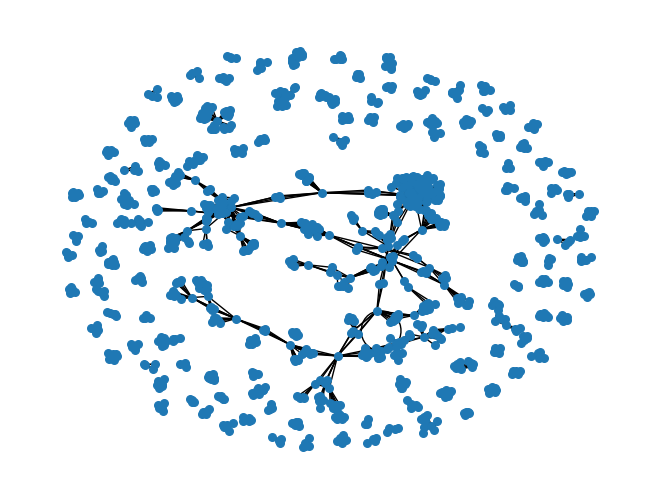

In [27]:
G = nx.Graph()
G.add_edges_from(weighted_edges)
nx.draw(G, with_labels=False, node_size=30)

#### Часть 4

В этой части я определила кластеры ключевых слов с помощью https://networkx.org/documentation/stable/reference/algorithms/generated/networkx.algorithms.community.louvain.louvain_communities.html, вывела немного статистической информации о них, произвела оценку по модулярности и покрытию. А также визуализировала граф состоящий из 5 самых больших кластеров, разделив из по цветам.

In [28]:
import networkx as nx
from networkx.algorithms.community import quality
print(dir(quality))
import matplotlib.pyplot as plt
from matplotlib import colors as mcolors

['NetworkXError', 'NotAPartition', '__all__', '__builtins__', '__cached__', '__doc__', '__file__', '__loader__', '__name__', '__package__', '__spec__', '_require_partition', 'argmap', 'combinations', 'inter_community_edges', 'inter_community_non_edges', 'intra_community_edges', 'is_partition', 'modularity', 'nx', 'partition_quality', 'require_partition']


In [29]:
communities = nx.community.louvain_communities(G, resolution=0.9)
print(f"Количество кластеров: {len(communities)}")

Количество кластеров: 130


In [30]:
# Немного статы:

sizes = [len(c) for c in communities]

singletons = 0
for size in sizes:
    if size == 1:
        singletons += 1

comm_df = pd.DataFrame({
    "cluster_id": list(range(len(communities))),
    "n_nodes": sizes
}).sort_values("n_nodes", ascending=False).reset_index(drop=True)

top_comm = comm_df.head(5)

print("\nСтаты:")
print(f"Вершин: {G.number_of_nodes()}, ребер: {G.number_of_edges()}")
print(f"Количество кластеров: {len(communities)}")
print(f"Количество кластеров из 1 вершины: {singletons}")
print("\nТоп 5 кластеров по размерам:")
display(top_comm)



Статы:
Вершин: 1172, ребер: 3084
Количество кластеров: 130
Количество кластеров из 1 вершины: 0

Топ 5 кластеров по размерам:


,cluster_id,n_nodes
0,115,94
1,113,73
2,85,69
3,102,67
4,0,54


In [31]:
# Оценим качество:
modularity = quality.modularity(G, communities)
print(f"Модулярность: {modularity}")

total_edges = G.number_of_edges()
in_edges = quality.intra_community_edges(G, communities)
coverage = (in_edges / total_edges) if total_edges else 0.0
print(f"Доля рёбер, которые лежат внутри сообществ, от общего числа рёбер: {coverage}")

Модулярность: 0.9562840541350897
Доля рёбер, которые лежат внутри сообществ, от общего числа рёбер: 0.9860570687418937


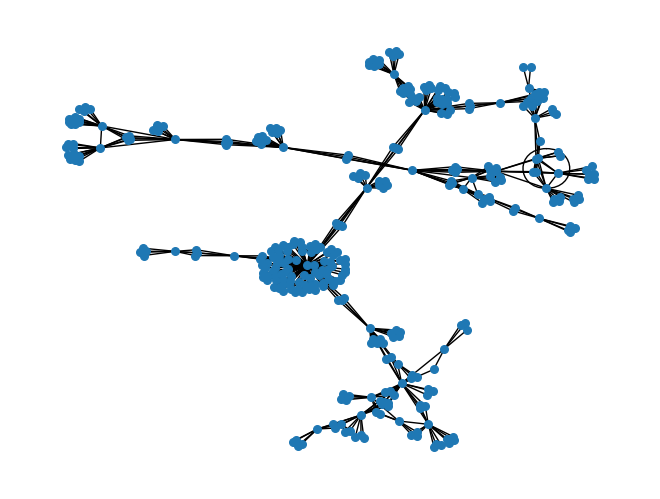

In [32]:
# Визуализируем 5 самых крупных сообществ:

top_nodes = []
for comm_id in top_comm["cluster_id"]:
    comm_nodes = communities[comm_id]
    top_nodes.extend(comm_nodes)
    
S = G.subgraph(top_nodes)
nx.draw(S, with_labels=False, node_size=30)

In [33]:
# Раскрасим наши кластеры:

def color_comm(graph, communities_list):
    colors = list(mcolors.BASE_COLORS.values())
    node_colors = []
    for node in graph.nodes():
        for i, community in enumerate(communities_list):
            if node in community:
                node_colors.append(colors[i % len(colors)])
                break
    return node_colors
         
node_colors = color_comm(S, [communities[i] for i in top_comm["cluster_id"]])

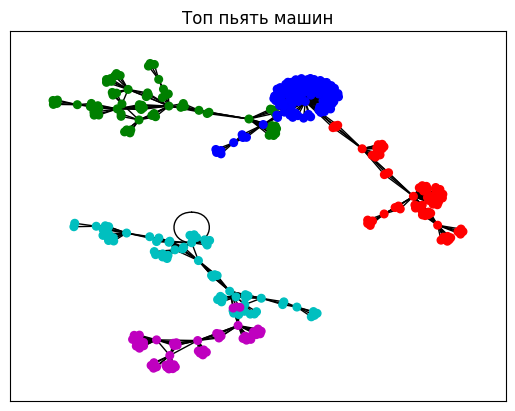

In [34]:
plt.title("Топ пьять машин")
pos = nx.spring_layout(S, seed=23)
nx.draw_networkx(S, pos=pos, with_labels=False, node_size=30, node_color=node_colors)

#### Часть 5

В этой части необходимо было найти ключевые слова с наибольшими значениями центральности в выбранной тематике (degree centrality, betweenness centrality, eigenvector centrality, closeness centrality), а также интерпретировать результат. Для этого я опиралась на документацию:
https://networkx.org/documentation/stable/reference/algorithms/centrality.html

In [35]:
from operator import itemgetter

In [36]:
print(f"Количество вершин в подграфе S: {S.number_of_nodes()}")
print(f"Количество рёбер в подграфе S: {S.number_of_edges()}")

Количество вершин в подграфе S: 357
Количество рёбер в подграфе S: 990


In [37]:
# Степень центральности - метрика, которая измеряет важность узла на основе его количества прямых связей с другими узлами в сети.
degree_centrality = nx.degree_centrality(S)
top_degree = sorted(degree_centrality.items(), key=itemgetter(1), reverse=True)[:10]
print("Топ 10 узлов по степени центральности:")
for node, score in top_degree:
    print(f"{node} - {score:.3f}")

Топ 10 узлов по степени центральности:
LHCb - 0.264
Machine Learning - 0.110
Dark Matter - 0.073
Port-Hamiltonian Systems - 0.056
Neural Networks - 0.053
LLMs - 0.051
Astronomy - 0.051
Neural Network - 0.051
Large Language Models - 0.048
GPU - 0.045


In [38]:
# Степень посредничества — это мера центральности узла в сети, показывающая, как часто этот узел оказывается на кратчайшем пути между другими парами узлов.
betweenness_centrality = nx.betweenness_centrality(S)
top_betweenness = sorted(betweenness_centrality.items(), key=itemgetter(1), reverse=True)[:10]
print("Топ 10 узлов по степени посредничества:")
for node, score in top_betweenness:
    print(f"{node} - {score:.3f}")

Топ 10 узлов по степени посредничества:
LHCb - 0.352
Astronomy - 0.191
Neural Network - 0.181
Dark Matter - 0.169
Machine Learning - 0.164
Bayesian - 0.072
Port-Hamiltonian Systems - 0.063
Phosphorus - 0.049
Reinforcement Learning - 0.049
Gravitation - 0.046


In [39]:
# Степень влиятельности — это мера влияния узла в сети. Относительные величины показателя назначаются всем узлам на основе концепции, что связь с узлом высокой степени влиятельности вкладывает больше в показатель рассматриваемого узла, чем аналогичная связь с узлом низкой степени влиятельности.
eigenvector_centrality = nx.eigenvector_centrality(S)
top_eigenvector = sorted(eigenvector_centrality.items(), key=itemgetter(1), reverse=True)[:10]
print("Топ 10 узлов по степени влиятельности:")
for node, score in top_eigenvector:
    print(f"{node} - {score:.3f}")

Топ 10 узлов по степени влиятельности:
LHCb - 0.636
Proton-Proton Collision Data - 0.140
Luminosity - 0.122
Branches - 0.119
CP - 0.112
Proton-Proton Collisions - 0.108
Polarisation - 0.107
Verity - 0.107
Neural Network - 0.100
Amplitude Analysis - 0.097


In [40]:
# Степень близости узла — это мера центральности в сети, которая работает по принципу чем более централен узел, тем ближе он ко всем другим узлам.
closeness_centrality = nx.closeness_centrality(S)
top_closeness = sorted(closeness_centrality.items(), key=itemgetter(1), reverse=True)[:10]
print("Топ 10 узлов по степени близости:")
for node, score in top_closeness:
    print(f"{node} - {score:.3f}")

Топ 10 узлов по степени близости:
LHCb - 0.288
Astronomy - 0.245
Neural Network - 0.242
Heavy Quarks - 0.221
P$-wave - 0.221
B_{c}^{+} \gamma - 0.221
Time of Flight - 0.220
Deuteron - 0.220
Triton - 0.220
Proton-Helium Collision - 0.220


#### Анализ и выводы:


Абсолютный победитель - LHCb (Large Hadron Collider beauty) - ключевой эксперимент, связывающий физику частиц и астрофизику. Его высокие значения по всем метрикам подчёркивают центральную роль.

Machine Learning, Deep Learning и другие показывают, как мл все больше используется во всевозможных областях.

В топе встречаются и более классические темы - Dark Matter, Astronomy, Gravitation, остающиеся основой исследований.

#### Часть 6

В заключительной части я построила граф публикаций, узлы которого - публикации, ребра - наличие общих ключевых слов, а вес ребра - количество общих ключевых слов. Также реализовала алгоритм, который для любой выбранной публикации находит наиболее похожие на неё статьи. "Похожесть" я определяла на основе построенного графа: чем больше у двух статей общих ключевых слов, тем они ближе друг к другу.


In [41]:
df['keywords_set'] = df['keywords'].apply(set)
df.head()

,title,summary,authors,categories,keywords,keywords_set
0,Pulsations in Binary Star Systems,High-precision and long-duration light curves ...,"['John Southworth', 'Dominic Bowman']",['astro-ph.SR'],"[Pulsations, Binary Star Systems, Astrophysics...","{Binary Star Systems, Astrophysics, Pulsations..."
1,Constraints on Dark Matter Models from Superma...,A semi-analytical model for the evolution of g...,"['John Ellis', 'Malcolm Fairbairn', 'Juan Urru...","['astro-ph.CO', 'astro-ph.HE', 'hep-ex', 'hep-...","[Dark Matter, Supermassive Black Hole, CDM, JW...","{Supermassive Black Hole, JWST, CDM, Galactic ..."
2,Reinforcement learning meets bioprocess contro...,The inherent complexity of living cells as pro...,"['Juan D. Gil', 'Ehecatl Antonio Del Rio Chano...","['eess.SY', 'cs.AI', 'cs.LG', 'cs.SY']","[Reinforcement Learning, RL, Behavior Cloning,...","{RL, pH Regulation, Open Photobioreactors, Bio..."
3,Hydrodynamical Simulations of Planet Rebound M...,This study investigates the orbital migration ...,"['Beibei Liu', 'Clément Baruteau', 'Zhaohuan Z...",['astro-ph.EP'],"[Hydrodynamical Simulations, Planet Rebound Mi...","{Stellar X-ray, Hydrodynamical Simulations, Pl..."
4,Port-Hamiltonian Neural Networks: From Theory ...,This work introduces a new framework integrati...,"['Luca Di Persio', 'Matthias Ehrhardt', 'Youne...","['math-ph', 'math.CA', 'math.MP', '37N40, 37B5...","[Port-Hamiltonian Neural Networks, pHNNs, Stoc...","{Port-Hamiltonian Neural Networks, Robotic Con..."


Graph with 250 nodes and 670 edges


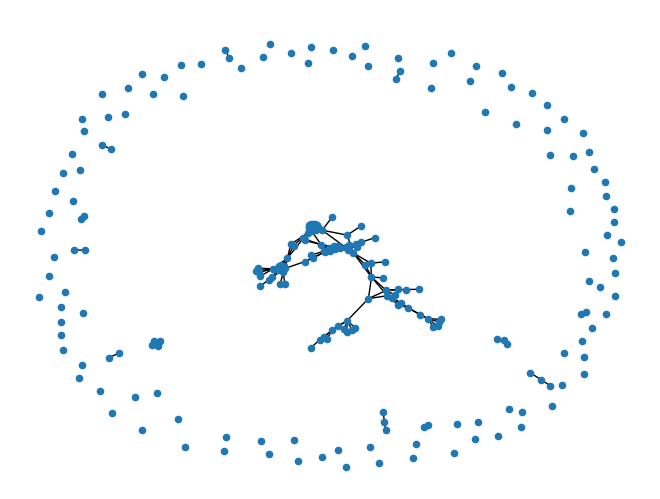

In [42]:
publication_graph = nx.Graph()

for i in df.index:
    publication_graph.add_node(i)
    
for pair in combinations(df.index, 2):
    node_1, node_2 = pair
    common_keywords = df.loc[node_1, 'keywords_set'].intersection(df.loc[node_2, 'keywords_set'])
    if common_keywords:
        weight = len(common_keywords)
        publication_graph.add_edge(node_1, node_2, weight=weight)
  
nx.draw(publication_graph, with_labels=False, node_size=20)
print(publication_graph)

In [43]:
for i, j, w in publication_graph.edges(data=True):
    print(i, j, w)

0 33 {'weight': 1}
0 152 {'weight': 1}
1 134 {'weight': 1}
1 155 {'weight': 1}
1 156 {'weight': 1}
1 164 {'weight': 1}
1 167 {'weight': 1}
1 168 {'weight': 1}
1 200 {'weight': 1}
1 214 {'weight': 1}
1 239 {'weight': 1}
2 110 {'weight': 1}
2 138 {'weight': 1}
10 16 {'weight': 1}
10 22 {'weight': 1}
10 26 {'weight': 1}
10 30 {'weight': 1}
10 44 {'weight': 1}
10 51 {'weight': 1}
10 55 {'weight': 2}
10 60 {'weight': 1}
10 77 {'weight': 1}
10 78 {'weight': 1}
10 79 {'weight': 1}
10 82 {'weight': 1}
10 105 {'weight': 1}
10 106 {'weight': 1}
10 112 {'weight': 1}
10 126 {'weight': 1}
10 128 {'weight': 1}
10 133 {'weight': 1}
10 143 {'weight': 1}
10 153 {'weight': 1}
10 163 {'weight': 1}
10 178 {'weight': 1}
10 179 {'weight': 1}
10 182 {'weight': 1}
10 185 {'weight': 1}
10 202 {'weight': 1}
10 211 {'weight': 1}
10 241 {'weight': 1}
10 242 {'weight': 1}
10 245 {'weight': 1}
11 94 {'weight': 1}
11 138 {'weight': 1}
11 207 {'weight': 1}
12 53 {'weight': 1}
12 56 {'weight': 1}
12 221 {'weight': 1}


In [46]:
# Ниже я реализовала алгоритм для нахождения top_n самых похожих публикаций для заданной статьи (pub_id).
# Схожесть определяется весом ребра в графе публикаций, который равен количеству общих ключевых слов.

def find_similar_publications(pub_id, graph, df, top_n):
    if pub_id not in graph:
        return "Публикация с таким id не найдена"

    neighbors = graph[pub_id]
    sorted_neighbors = sorted(neighbors.items(), key=lambda item: item[1]['weight'], reverse=True)
    
    target_pub_title = df.loc[pub_id, 'title']
    target_pub_keywords = df.loc[pub_id, 'keywords']
    print(f"Заданая публикация - {pub_id}")
    print(f"Название: «{target_pub_title}»")
    print(f"Ключевые слова: {target_pub_keywords}\n")
    
    if not sorted_neighbors:
        print("Не найдено публикаций с общими ключевыми словами.")
        return

    print(f"Топ {top_n} самых похожих публикаций:")
    
    for i, (neighbor_id, data) in enumerate(sorted_neighbors[:top_n]):
        neighbor_title = df.loc[neighbor_id, 'title']
        weight = data['weight']
        
        common_keywords = df.loc[pub_id, 'keywords_set'].intersection(df.loc[neighbor_id, 'keywords_set'])
        
        print(f"{i+1}. Публикация {neighbor_id}")
        print(f"    Название: «{neighbor_title}»")
        print(f"    Количество общих ключевых слов: {weight} {list(common_keywords)}")

In [55]:
top_n = 5
publication_id = 249
find_similar_publications(publication_id, publication_graph, df, top_n)

Заданая публикация - 249
Название: «A persistent-homology-based Bayesian prior for potential coefficient reconstruction in an elliptic PDE»
Ключевые слова: ['Bayesian Prior', 'Persistent Homology', 'Potential Coefficient', 'Elliptic PDE']

Топ 5 самых похожих публикаций:
1. Публикация 98
    Название: «Revealing the Void-Size Distribution of Silica Glass using Persistent Homology»
    Количество общих ключевых слов: 1 ['Persistent Homology']
2. Публикация 145
    Название: «Positional Encoding meets Persistent Homology on Graphs»
    Количество общих ключевых слов: 1 ['Persistent Homology']
3. Публикация 192
    Название: «Persistent Homology: A Pedagogical Introduction with Biological Applications»
    Количество общих ключевых слов: 1 ['Persistent Homology']
